**Regression with all features**

In [72]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [73]:
df = pd.read_csv('Burglary Data - Aggregated CSV.csv', parse_dates=['Date'])

In [74]:
df.head()

,Unnamed: 0,LSOA code,Date,LSOA name,Ward code,Ward name,LSOA Area Size (HA),Burglary Count,Overall Ranking - IMD,Housing rank,Health rank,Living environment rank,Crime rank,Education rank,Income rank,Employment rank
0,NaN,E01000002,2010-12-01,City of London 001B,E05009302,Cripplegate,22.83,1,4700.0,3646.0,4095.0,3347.0,4834.0,4828.0,4549.0,4559.0
1,NaN,E01004512,2010-12-01,Wandsworth 019B,E05014028,Wandsworth Town,11.52,1,3621.0,3930.0,3053.0,1996.0,2499.0,3863.0,3745.0,3130.0
2,NaN,E01001676,2010-12-01,Greenwich 033C,E05014088,Plumstead Common,13.14,4,1370.0,1507.0,647.0,3430.0,2449.0,1159.0,1271.0,977.0
3,NaN,E01004514,2010-12-01,Wandsworth 012C,E05014028,Wandsworth Town,16.38,3,4104.0,4497.0,2484.0,1619.0,3696.0,4111.0,4092.0,4119.0
4,NaN,E01001675,2010-12-01,Greenwich 006D,E05014087,Plumstead & Glyndon,15.53,3,1318.0,1645.0,1097.0,1965.0,971.0,1122.0,1082.0,1697.0


In [75]:
df = df.drop(columns=['Unnamed: 0', 'LSOA code', 'LSOA name', 'Ward code', 'Ward name'])

In [76]:
df.head()

,Date,LSOA Area Size (HA),Burglary Count,Overall Ranking - IMD,Housing rank,Health rank,Living environment rank,Crime rank,Education rank,Income rank,Employment rank
0,2010-12-01,22.83,1,4700.0,3646.0,4095.0,3347.0,4834.0,4828.0,4549.0,4559.0
1,2010-12-01,11.52,1,3621.0,3930.0,3053.0,1996.0,2499.0,3863.0,3745.0,3130.0
2,2010-12-01,13.14,4,1370.0,1507.0,647.0,3430.0,2449.0,1159.0,1271.0,977.0
3,2010-12-01,16.38,3,4104.0,4497.0,2484.0,1619.0,3696.0,4111.0,4092.0,4119.0
4,2010-12-01,15.53,3,1318.0,1645.0,1097.0,1965.0,971.0,1122.0,1082.0,1697.0


In [77]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [78]:
df.head()

,Date,LSOA Area Size (HA),Burglary Count,Overall Ranking - IMD,Housing rank,Health rank,Living environment rank,Crime rank,Education rank,Income rank,Employment rank,Year,Month
0,2010-12-01,22.83,1,4700.0,3646.0,4095.0,3347.0,4834.0,4828.0,4549.0,4559.0,2010,12
1,2010-12-01,11.52,1,3621.0,3930.0,3053.0,1996.0,2499.0,3863.0,3745.0,3130.0,2010,12
2,2010-12-01,13.14,4,1370.0,1507.0,647.0,3430.0,2449.0,1159.0,1271.0,977.0,2010,12
3,2010-12-01,16.38,3,4104.0,4497.0,2484.0,1619.0,3696.0,4111.0,4092.0,4119.0,2010,12
4,2010-12-01,15.53,3,1318.0,1645.0,1097.0,1965.0,971.0,1122.0,1082.0,1697.0,2010,12


In [79]:
df = df.drop(columns=['Date'])

In [80]:
df = df.dropna()

In [81]:
X = df.drop(columns=['Burglary Count'])
y = df['Burglary Count']

In [82]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [83]:
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [84]:
coefficients = pd.Series(model.coef_, index=X.columns)
print("Intercept:", model.intercept_)
print("Coefficients:\n", coefficients.sort_values(key=abs, ascending=False))

Intercept: 2.0893038605684904
Coefficients:
 Overall Ranking - IMD     -1.320814
Employment rank            0.463975
Income rank                0.369652
Education rank             0.239861
Health rank                0.192281
Housing rank               0.166703
Year                      -0.156183
LSOA Area Size (HA)        0.064734
Living environment rank   -0.050022
Crime rank                 0.034018
Month                     -0.000932
dtype: float64


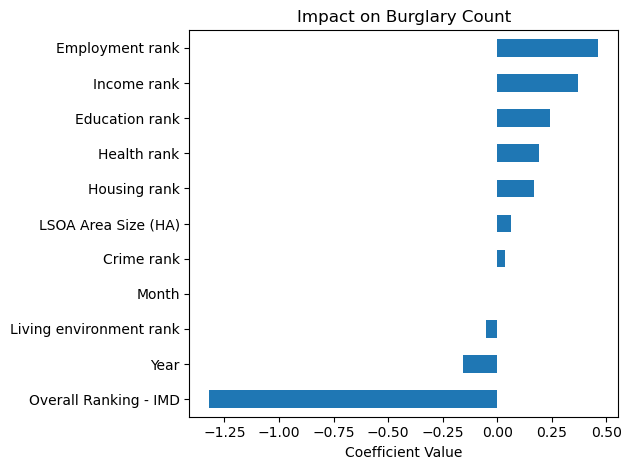

In [85]:
coefficients.sort_values().plot(kind='barh', title='Impact on Burglary Count')
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

In [87]:
df_model = pd.concat([X, y], axis=1).dropna()
X = df_model.drop(columns=['Burglary Count'])
y = df_model['Burglary Count']
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Burglary Count   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     2643.
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        22:10:10   Log-Likelihood:            -9.8988e+05
No. Observations:              520571   AIC:                         1.980e+06
Df Residuals:                  520559   BIC:                         1.980e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

**Regression taking into account highly correlating features**

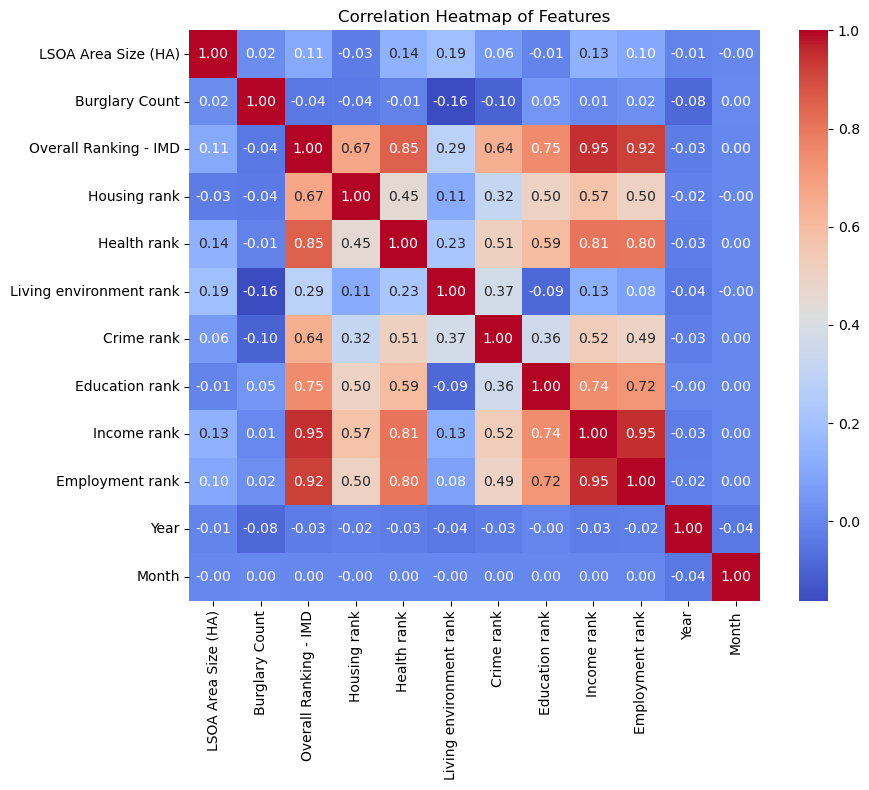

In [88]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

In [97]:
corr_matrix = df.corr(numeric_only=True).abs()
to_flag = set()
for col in corr_matrix.columns:
    high_corrs = corr_matrix[col][(corr_matrix[col] > 0.7) & (corr_matrix[col] < 1)]
    if len(high_corrs) >= 2:
        to_flag.add(col)
    if any(high_corrs > 0.9):
        to_flag.add(col)
print("🔍 Features flagged due to high correlation:")
for col in sorted(to_flag):
    print(f" - {col}")

🔍 Features flagged due to high correlation:
 - Education rank
 - Employment rank
 - Health rank
 - Income rank
 - Overall Ranking - IMD


Above is based on that a feature has at least 2 features with which it correlates more than 0.7 or there is at least 1 feature with which it correlates more than 0.9 (here we talk about absolute correlation). 

In [109]:
df = pd.read_csv('Burglary Data - Aggregated CSV.csv', parse_dates=['Date'])
df = df.drop(columns=['Unnamed: 0', 'LSOA code', 'LSOA name', 'Ward code', 'Ward name'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df = df.drop(columns=['Date'])
df = df.dropna()
X = df.drop(columns=['Burglary Count', 'Health rank', 'Income rank', 'Employment rank', 'Education rank', 'LSOA Area Size (HA)', 'Year', 'Month', 'Housing rank', 'Overall Ranking - IMD']) 
y = df['Burglary Count']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [110]:
coefficients = pd.Series(model.coef_, index=X.columns)
print("Intercept:", model.intercept_)
print("Coefficients:\n", coefficients.sort_values(key=abs, ascending=False))

Intercept: 2.0893038605684913
Coefficients:
 Living environment rank   -0.239784
Crime rank                -0.077686
dtype: float64


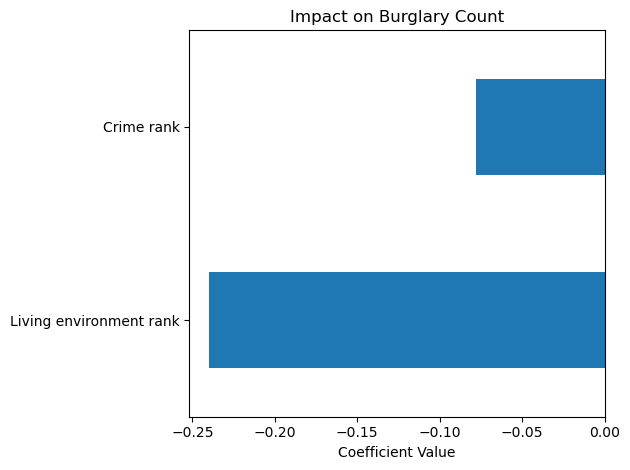

In [111]:
coefficients.sort_values().plot(kind='barh', title='Impact on Burglary Count')
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

In [112]:
df_model = pd.concat([X, y], axis=1).dropna()
X = df_model.drop(columns=['Burglary Count'])
y = df_model['Burglary Count']
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Burglary Count   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     7480.
Date:                Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                        22:29:40   Log-Likelihood:            -9.9665e+05
No. Observations:              520571   AIC:                         1.993e+06
Df Residuals:                  520568   BIC:                         1.993e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

**After running the model you wanted, to save the coefficients, run:**

In [ ]:
with open("give a name here.txt", "w") as f: # give a name here 
    f.write(f"Intercept: {model.intercept_}\n")
    f.write("Coefficients:\n")
    f.write(coefficients.to_string())

print("Saved")